# Primary Track Studies of EM Showers

**In this session we do the primary track studies of EM showers from electron MC and truth MC (nueCC).**

In [444]:
%load_ext autoreload
%autoreload 2

from utils/emshower import *
from utils/showerrec import *
from utils/robustfit import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## key definitions:

### 🌚 blinded set (i.e. obtained solely by track property; event ID not used):

**🌒 primary_trk:** the trkID of the tracks starting from the first plate. 28 entries. 25 events included.

**🌒 df_primary:** primary track data frame. Tracks starting from the first plate. Should have 28 entries.

### 🌝 truth set (i.e. obtained by event ID):
**🌔 true_prim:** real primary tracks data frame. Which means the injected electron track of each electron event. **Notice!** Not all of them are at the energy of 200 GeV.

**🌔 truth_df_primary:** real primary tracks from the truth MC file, with trkID==10001. Used in the truth cylinder selection.

In [445]:
df = pd.read_csv("select.csv")

In [446]:
startPID = df['PID'].min()

Define `minPID` as the first PID where a **track** starts.

Define `injectPID` as the first PID where an **event** starts.

In [ ]:
df['minPID'] = df.groupby('trkID')['PID'].transform('min')
df['injectPID'] = df.groupby('evtID')['PID'].transform('min')

# blinded primary track lists
primary_trk = df[df['minPID']==startPID]['trkID'].unique()

print(len(primary_trk))
print(len(df["evtID"].unique()))

28
29


**Get the blinded primary tracks data frame:**

In [468]:
df_primary = df[(df['trkID'].isin(primary_trk))&(df['PID']==df['minPID'])]

print(len(df_primary))
df_primary.head(10)

# the selected primary tracks are all electrons, either primary ones, or secondary.

28


,evtID,trkID,segnum,PID,pdgID,X,Y,Z,TX,TY,E,minPID
0,100162,260,7,0,11,-15049.8450,26997.371,188501.5,0.001404,-0.008478,2.379458,0
7,100210,326,5,0,11,-4049.3936,12522.672,188501.5,-0.012750,0.009039,200.000000,0
12,100826,1363,11,0,-11,-15016.0400,25203.900,188501.5,0.004177,0.001947,7.996618,0
23,100922,1519,3,0,-11,-8954.3470,16310.136,188501.5,0.000953,0.003759,7.291583,0
115,100225,346,8,0,11,-3940.6638,26013.857,188501.5,0.000561,0.000326,200.000000,0
142,100448,730,8,0,11,-6981.4020,17092.988,188501.5,0.000292,-0.001355,200.000000,0
153,100598,964,7,0,11,-14777.5470,16281.595,188501.5,-0.002094,0.001679,200.000000,0
715,100089,140,11,0,11,-7367.7764,22766.879,188501.5,-0.000904,0.000532,200.000000,0
808,100706,1133,14,0,11,-5480.1900,15609.240,188501.5,0.000478,0.001686,200.000000,0
916,100288,450,9,0,11,-14454.1140,23962.640,188501.5,0.000952,-0.000396,200.000000,0


At first, we defined `true_prim=df[df["E"]>199]`. 

However, we found that sometimes (for example, trkID=100922) the real primary track starting from the first plate generated in the MC sample does not have the energy of 200 GeV.

Therefore, the **primary track data frame** will be set as `true_prim=df[(df["evtID"].isin(true_num))&(df["PID"]==df["injectPID"])]` anyway.

You may notice that, in `true_prim`, occasionally there are two primary tracks in one events. Usually they're electron-positron pair production.

In [ ]:
# true_prim = df[df["E"]>199]
full_energy = df[df["E"]>199]

# primary electron event ID list
true_num = full_energy["evtID"].unique()
print(true_num)

# truth primary electron data frame
true_prim = df[(df["evtID"].isin(true_num))&(df["PID"]==df["injectPID"])]

print(len(true_num))
print(len(true_prim))

duplicates = true_prim["evtID"].value_counts()
duplicates = duplicates[duplicates > 1].index.tolist()
print(duplicates)

[100210 100089 100598 100225 100448 100833 100706 100116 100400 100160
 100288 100291 100325 100150 100890 100930 100803 100922 100857 100162
 100640 100123 100301 100537 100826 100852 100155 100641]
28
32
[100162, 100116, 100857, 100210]


There are **29** events in this MC sample. Only **28** are primary electrons. The rest one is a **proton**:

In [485]:
evt_num = df["evtID"].unique()

bkg_id = set(evt_num).difference(set(true_num))
print(len(bkg_id))
bkg = df[(df["evtID"].isin(bkg_id)) & (df["PID"]==df["minPID"])]
bkg.head(5)

# only 1 neutron bkg event in this MC sample.

1


,evtID,trkID,segnum,PID,pdgID,X,Y,Z,TX,TY,E,minPID,injectPID
3650,100533,157,4,81,2212,-13332.423,29096.660,304088.50,0.223213,-0.133566,1.445281,81,81
8212,100533,34,10,93,2212,-9743.122,27016.234,321212.53,0.185636,-0.134595,1.445281,93,81


## Abnormal Tracks Studies from MC 
### (not quite important & can be skipped)

In many cases, the tracks which divide into electron-positron pairs will change pdgID from electron to positron suddenly. Which is actually okay.. See the block below:

In [110]:
df_100089 = df[(df["evtID"]==100922)&(df["E"]>199)&(df["PID"]<10)]
df_100089.head(15)
#               7   8   9   10
# trkID = 8382: e   e+  e+  e+
#         10099     e   e   e

,evtID,trkID,segnum,PID,pdgID,X,Y,Z,TX,TY,E,minPID
4282,100922,63103,7,6,11,-8945.556,16313.596,197063.48,0.002841,0.000196,200.0,6


Also, the only track in the 29 potential primary tracks is a proton:

In [345]:
df_proton = df[(df["evtID"]==100533)]
df_proton = df_proton[df_proton["PID"]<df_proton["PID"].min()+4]
df_proton.head(10)

,evtID,trkID,segnum,PID,pdgID,X,Y,Z,TX,TY,E,minPID
3650,100533,157,4,81,2212,-13332.423,29096.660,304088.5,0.223213,-0.133566,1.445281,81
3651,100533,157,4,82,2212,-13019.201,28909.928,305515.5,0.210843,-0.127685,1.445281,81
3652,100533,157,4,83,2212,-12717.998,28727.178,306942.5,0.206082,-0.122889,1.445281,81
3653,100533,157,4,84,2212,-12418.273,28545.834,308369.5,0.206573,-0.130448,1.445281,81


We also studied tracks by grouping them via **[evtID, trkID, pdgID]**.

In [61]:
groups_with_different_energy = (
    df.groupby(["evtID", "trkID", "pdgID"])["E"]
    .nunique()
    .loc[lambda x: x > 1]
    .index.tolist()
)
print(groups_with_different_energy)

[(100089, 140, -11), (100089, 140, 11), (100089, 377, 11), (100089, 5979, -11), (100089, 8373, 11), (100089, 10062, -11), (100089, 10062, 11), (100089, 14257, -11), (100089, 14295, -11), (100089, 16544, -11), (100089, 16544, 11), (100089, 16576, -11), (100089, 18389, -11), (100089, 18389, 11), (100089, 18445, -11), (100089, 18445, 11), (100089, 18548, 11), (100089, 20135, -11), (100089, 21161, -11), (100089, 21933, -11), (100089, 22061, 11), (100089, 22102, -11), (100089, 22103, 11), (100089, 22684, -11), (100089, 22817, -11), (100089, 22817, 11), (100089, 23081, 11), (100089, 23086, 11), (100089, 23123, 11), (100089, 23218, 11), (100089, 23276, -11), (100089, 23424, -11), (100089, 23691, 11), (100116, 952, -11), (100116, 1953, -11), (100116, 1957, -11), (100116, 1957, 11), (100116, 3650, 11), (100116, 3665, 11), (100116, 5710, 11), (100116, 7663, -11), (100116, 7663, 11), (100116, 7685, -11), (100116, 10966, -11), (100116, 10966, 11), (100116, 13220, 11), (100116, 13226, -11), (100116

## Plot Shower Profiles from Electron MC

In the block below, we defined a function `profile_single` to plot **shower profiles** of primary tracks from the **electron MC sample**.

In [349]:
from scipy.stats import mode
from scipy.interpolate import CubicSpline

def profile_single(eventID=100803, file="plot.png"):
    #df_100089_check = df[(df["evtID"]==eventID)&(df["E"]>199)]
    df_single_check = df[(df["evtID"]==eventID)&(df["PID"]<30)]
    plt.scatter(df_single_check["PID"], df_single_check["X"], s=5, color="blue", label=f"evt {eventID}")
    count_e = 0
    count_p = 0
    count_else = 0
    count = 0
    inject_pid = df_single_check[df_single_check["E"]>199]["PID"].min() # the plate of injection (or: starting plate)
    # print(inject_pid)
    for trkID, group in df_single_check.groupby("trkID"):
    
        pdgID = mode(group["pdgID"]).mode[0] # the most frequent pdgID
        if pdgID == 11:
            color = "lightblue"
        elif pdgID == -11:
            color = "orange"
        else:
            color = "green"
    
        if group["PID"].iloc[0]<inject_pid-1: color = "purple"

        # Perform linear fit:
        '''
        coefficients = np.polyfit(group["PID"], group["X"], 1)
        slope, intercept = coefficients
        '''

        # curved connection:
        if len(group)<2: continue
        cs = CubicSpline(group["PID"], group["X"], bc_type='natural')
        pid_range = np.linspace(group["PID"].min(), group["PID"].max(), 100)
        # x_fit = slope * pid_range + intercept
        x_fit = cs(pid_range)

        # Plot the line
        if (pdgID == 11) & (count_e==0) & (color!="purple"):
            plt.plot(pid_range, x_fit, label="electron", c=color)
            count_e += 1
        if (pdgID == -11) & (count_p==0) & (color!="purple"):
            plt.plot(pid_range, x_fit, label="positron", c=color)
            count_p += 1
        if (abs(pdgID)!=11) & (count_else==0):
            plt.plot(pid_range, x_fit, label="photon", c=color)
            count_else += 1
        if (color == "purple") & (count==0):
            plt.plot(pid_range, x_fit, label="pre-injection", c=color)
            count += 1
        else: plt.plot(pid_range, x_fit, c=color)


    # Customize and show the plot
    plt.xlabel("PID")
    plt.ylabel("X / um")
    plt.legend()
    plt.title("Shower Profile for Single Event")
    # plt.show()
    plt.savefig(file)
    plt.close()

### shower profile production in electron MC

Then we apply this function to every primary electron event, and get the shower profiles from MC:

In [350]:
for i in true_num:
    profile_single(i, f"plots/profile_{i}.png")

### single shower profile check

0


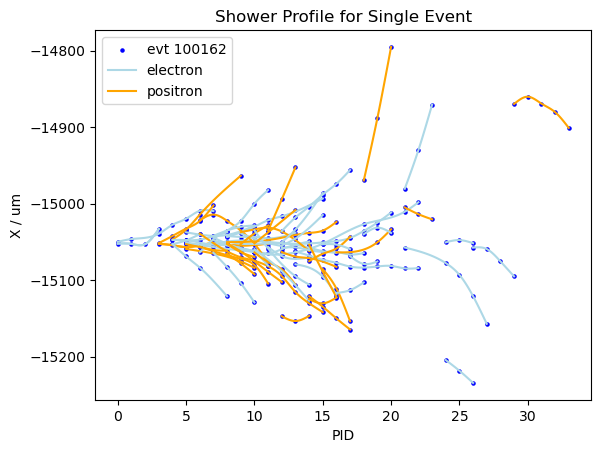

In [319]:
eventID = 100162
#df_100089_check = df[(df["evtID"]==eventID)&(df["E"]>199)]
#df_single_check = df[(df["evtID"]==eventID)&(df["PID"]<50)]
df_single_check = df[(df["evtID"]==eventID)]
plt.scatter(df_single_check["PID"], df_single_check["X"], s=5, color="blue", label=f"evt {eventID}")
count_e = 0
count_p = 0
count_else = 0
count = 0
inject_pid = df_single_check[df_single_check["E"]>199]["PID"].min()
print(inject_pid)
for trkID, group in df_single_check.groupby("trkID"):
    
    # pdgID = mode(group["pdgID"]).mode[0] # the most frequent pdgID
    min_pid_row = group.loc[group["PID"].idxmin()]
    pdgID = min_pid_row["pdgID"]
    if pdgID == 11:
        color = "lightblue"
    elif pdgID == -11:
        color = "orange"
    else:
        color = "green"
    
    if (group["PID"].iloc[0]<=inject_pid) & (pdgID!=11): color = "purple"

    # Perform linear fit:
    '''
    coefficients = np.polyfit(group["PID"], group["X"], 1)
    slope, intercept = coefficients
    '''

    # curved connection:
    if len(group)<2: continue
    cs = CubicSpline(group["PID"], group["X"], bc_type='natural')
    pid_range = np.linspace(group["PID"].min(), group["PID"].max(), 100)
    # x_fit = slope * pid_range + intercept
    x_fit = cs(pid_range)

    # Plot the line
    if (pdgID == 11) & (count_e==0) & (color!="purple"):
        plt.plot(pid_range, x_fit, label="electron", c=color)
        count_e += 1
    if (pdgID == -11) & (count_p==0) & (color!="purple"):
        plt.plot(pid_range, x_fit, label="positron", c=color)
        count_p += 1
    if (abs(pdgID)!=11) & (count_else==0):
        plt.plot(pid_range, x_fit, label="proton", c=color)
        count_else += 1
    if (color == "purple") & (count==0):
        plt.plot(pid_range, x_fit, label="pre-injection", c=color)
        count += 1
    else: plt.plot(pid_range, x_fit, c=color)


# Customize and show the plot
plt.xlabel("PID")
plt.ylabel("X / um")
plt.legend()
plt.title("Shower Profile for Single Event")
plt.show()

## Shower Starting PID Checks

**Group by evtID and PID, and count distinct trkID values for each group**

We define the starting PID as the plate where the primary track starts to divide as two or more.

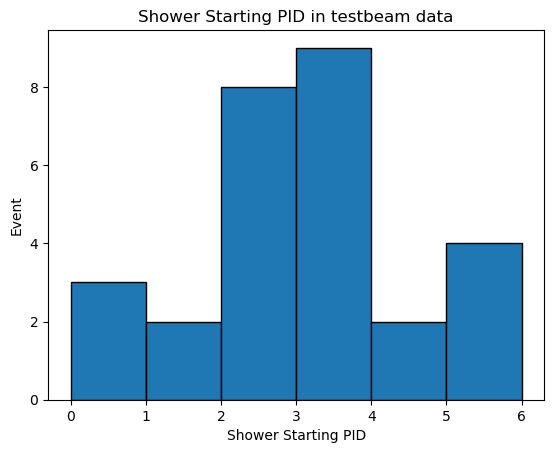

In [352]:
df = pd.read_csv("select.csv")

def plot_start(df, title='Shower Starting PID in testbeam data'):
    grouped = df.groupby(["evtID", "PID"])["trkID"].nunique()
    # grouped
    # Filter to only include rows where the count of distinct trkID is greater than 1
    filtered = grouped[grouped > 1]
    # filtered.head(50)
    min_pid = filtered.groupby("evtID").apply(lambda x: x.index.get_level_values('PID').min())
    # min_pid

    plt.hist(min_pid, bins=6, edgecolor='black')
    plt.xlabel('Shower Starting PID')
    plt.ylabel('Event')
    plt.title(title)
    plt.show()

plot_start(df)

## Shower Profile Variable Checks
### from truth event; before the cylinder selection



We now check the important variables in the electron MC data frame: **NSegSum**, **Shower Max** and **Shower Max Plate**.

Also, we checked that the selection criteria we defined for selecting primary electron tracks in the testbeam data have an efficiency of 100% in MC.

In [560]:
df = pd.read_csv("select.csv")
shower = 0
h_nsegsum = []
h_showermax = []
h_maxpid = []
h_showerstart = []

selected_shower = pd.DataFrame()

for evt in true_prim["evtID"].unique():
    df_evt = df[df["evtID"]==evt]
    profile = df_evt.groupby('PID').size().reset_index(name='count')
    profile.columns = ['PID', 'count']
    shower_max = profile['count'].max()
    max_pid = int(profile.loc[profile['count'] == shower_max, 'PID'].iloc[0])
    pid_range = range(max_pid - 3, max_pid + 4)
    nsegsum = profile[profile['PID'].isin(pid_range)]['count'].sum()

    h_nsegsum.append(nsegsum)
    h_showermax.append(shower_max)
    h_maxpid.append(int(max_pid))
    if(nsegsum<30): continue
    if(shower_max<7): continue
    if(max_pid<5): continue

    selected_shower = pd.concat([selected_shower, df_evt], ignore_index=True)
    shower += 1

print(shower)
print(len(df))
print(len(selected_shower))
print(len(h_nsegsum))

28
8798
8784
28


### Gaussian Fitting for Distribution Histograms

**We defined the `plot_gaussian` function for fitting histograms.**

In [563]:
def plot_gaussian(nsegsum, text='NSegSum', binning=20, fit_resolution=True):
    from scipy.optimize import curve_fit

    # Calculate key statistics
    mean_val = np.mean(nsegsum)
    median_val = np.median(nsegsum)
    std_val = np.std(nsegsum)
    max_val = np.max(nsegsum)
    min_val = np.min(nsegsum)

    # Plot histogram
    hist, bins, _ = plt.hist(nsegsum, bins=binning, alpha=0.7, edgecolor='black')
    plt.xlabel(text)
    plt.ylabel('Event')
    plt.title(f'{text} Distribution')

    # Fit a Gaussian curve
    bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Get bin centers

    # Define model function to be used to fit to the data above:
    def gauss(x, *p):
        A, mu, sigma = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2))

    # p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
    p0 = [1., mean_val, std_val]

    coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)

    #print('Fitted mean = ', coeff[1])
    #print('Fitted standard deviation = ', coeff[2])

    # Add key statistics as text on the plot

    stats_text = (
        f"Mean: {mean_val:.2f}\n"
        f"Median: {median_val:.2f}\n"
        f"Std Dev: {std_val:.2f}\n"
        f"Resolution: {std_val/mean_val*100:.2f}%"
        # f"Min: {min_val:.2f}\n"
        # f"Max: {max_val:.2f}"
    )

    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=7,
            verticalalignment='top', horizontalalignment='left', bbox=dict(boxstyle="round", facecolor="none", edgecolor="none", alpha=0.8))

    if fit_resolution:
        # Get the fitted curve
        hist_fit = gauss(bin_centers, *coeff)

        plt.plot(bin_centers, hist_fit, color='red')
        
        fit_text = (
            f"Fitted Mean: {coeff[1]:.2f}\n"
            f"Fitted Std Dev: {coeff[2]:.2f}\n"
            f"Fitted Resolution: {coeff[2]/coeff[1]*100:.2f}%"
        )
        plt.text(0.7, 0.95, fit_text, transform=plt.gca().transAxes, fontsize=7, color="blue",
            verticalalignment='top', horizontalalignment='left', bbox=dict(boxstyle="round", facecolor="none", edgecolor="none", alpha=0.8))
    
    plt.show()

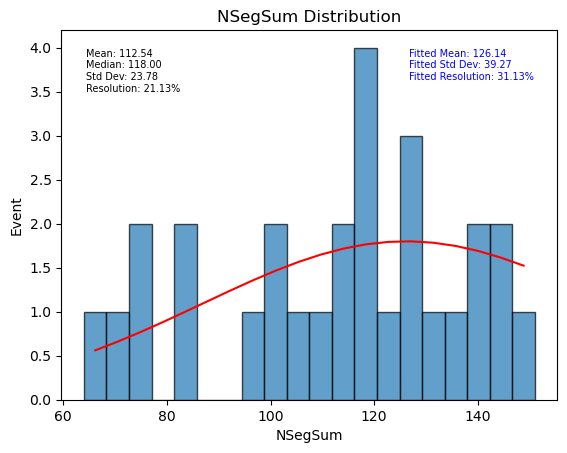

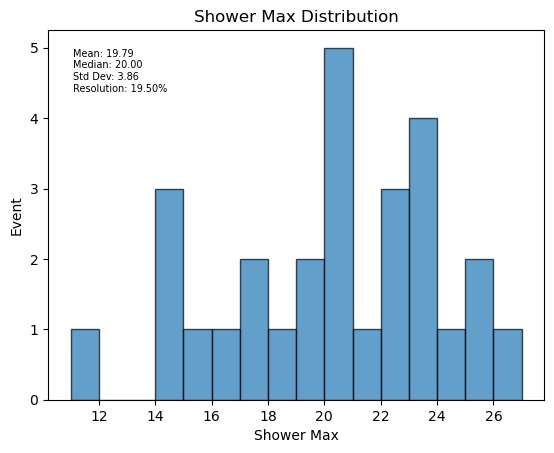

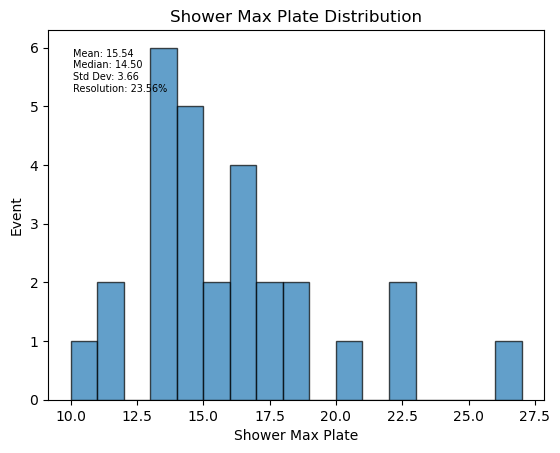

In [564]:
plot_gaussian(h_nsegsum, text='NSegSum')
plot_gaussian(h_showermax, binning=16, text='Shower Max', fit_resolution=False)
plot_gaussian(h_maxpid, binning=17, text='Shower Max Plate', fit_resolution=False)

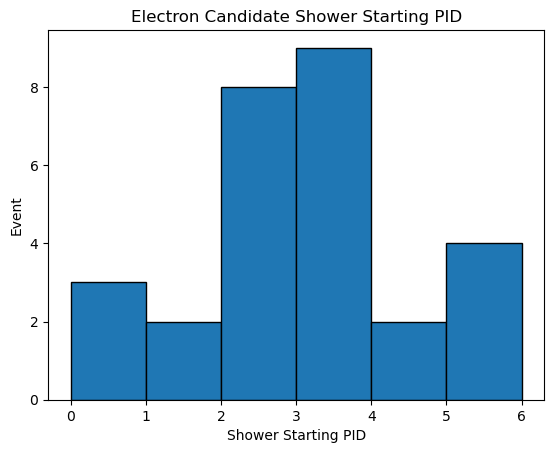

In [565]:
plot_start(selected_shower, title='Electron Candidate Shower Starting PID')

In [487]:
true_num

array([100210, 100089, 100598, 100225, 100448, 100833, 100706, 100116,
       100400, 100160, 100288, 100291, 100325, 100150, 100890, 100930,
       100803, 100922, 100857, 100162, 100640, 100123, 100301, 100537,
       100826, 100852, 100155, 100641])

**We found that the tracks with E=200 GeV are all electrons. With the codes presented below:**

```python
# Filter rows where column "E" > 199
df_primary = df[(df["E"] > 199)&(df["pdgID"]!=11)]
# Redefine df_primary to only keep the row with the minimum "PID" for each "evtID"
df_primary = df_primary.loc[df_primary.groupby("evtID")["PID"].idxmin()]
# Reset the index if needed
df_primary = df_primary.reset_index(drop=True)
```
and got zero entries!

In [367]:
import warnings
warnings.filterwarnings("ignore")

### Distributions after Blinded Cylinder Selections

In the next block, we apply the **blinded** cylinder selections on our simulation samples.

Which means, the `evtID` is not used just like how we would process with the testbeam data.

In [566]:
axis = Seg()

shower_profile = pd.DataFrame(columns=['prim_track', 'nsegsum', 'shower_max', 'max_pid', 'shower_start'])

df_cylinder = pd.DataFrame()
eventID = 0
for i, row in df_primary.iterrows():
    # if i%100 == 0: print(f"Processing row {i} / {len(df_primary)}")
    # if i<1200: continue
    # if i>1400: break
    
    axis_segments = df[df["trkID"]==row["trkID"]]

    axis.__init__()
    axis = initial_axis(axis_segments)
    
    if(abs(axis.TX)>0.05): continue
    if(abs(axis.TY)>0.05): continue
    # print(axis.TX)
    z0 = row["Z"]
    selected_segments = count_cylinder(axis, df, z0)
    # if(len(selected_segments)>3): print(f'pri_trkID={row["trkID"]} cylinder contains {len(selected_segments)}')
    if(len(selected_segments)<2): continue
    centroids = dbscan_for_pid(selected_segments)
    if(len(centroids)>1):
        axis_zx, axis_zy = fit_robust_axis(centroids)
        axis.set_attributes(axis_zx[1], axis_zy[1], 0.0, axis_zx[0], axis_zy[0])
    selected_segments_refit = count_cylinder(axis, df, z0)
    if(len(selected_segments_refit)<2): continue

    # label the segments in the refitted cylinder as the same event ID.
    selected_segments_refit["evtID"] = eventID
    eventID += 1
    
    profile = selected_segments_refit.groupby('PID').size().reset_index(name='count')
    profile.columns = ['PID', 'count']
    shower_max = profile['count'].max()
    max_pid = int(profile.loc[profile['count'] == shower_max, 'PID'].iloc[0])

    pid_range = range(max_pid - 3, max_pid + 4)
    nsegsum = profile[profile['PID'].isin(pid_range)]['count'].sum()

    # if(len(selected_segments)>30): print(f'shower max={shower_max} at PID {max_pid}, nsegsum={nsegsum}')
    grouped = selected_segments_refit.groupby(["PID"])["trkID"].nunique()
    filtered = grouped[grouped > 1]
    if len(filtered)>0:
        min_pid_start = int(filtered.index.get_level_values('PID').min())
    else:
        min_pid_start = 10000

    shower_profile = pd.concat([shower_profile, pd.DataFrame([{'prim_track': row["trkID"], 'nsegsum': nsegsum, 'shower_max': shower_max, 'max_pid': max_pid, 'shower_start': min_pid_start}])
    ], ignore_index=True)

    df_cylinder = pd.concat([df_cylinder, selected_segments_refit], ignore_index=True)

In [269]:
shower_profile

,prim_track,nsegsum,shower_max,max_pid,shower_start
0,140.0,62,11,16,2
1,3650.0,61,13,10,5
2,175.0,72,13,22,3
3,231.0,57,11,18,4
4,238.0,50,9,12,2
5,242.0,62,12,16,3
6,257.0,62,13,8,1
7,326.0,38,7,12,1
8,346.0,47,8,9,3
9,450.0,43,8,20,1


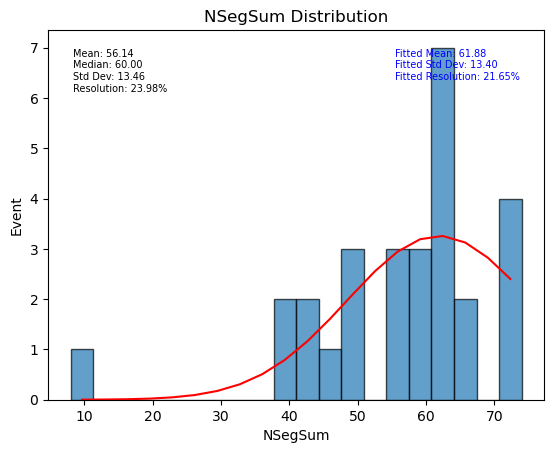

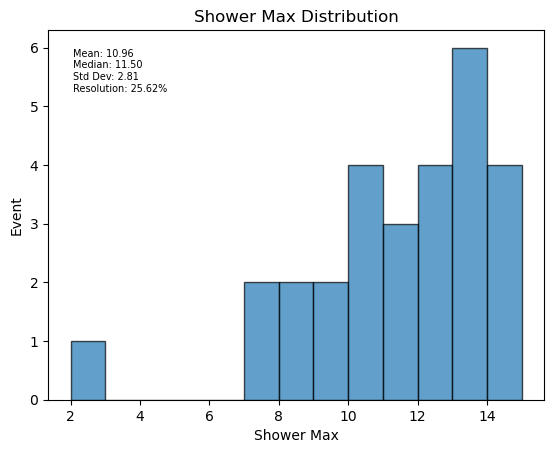

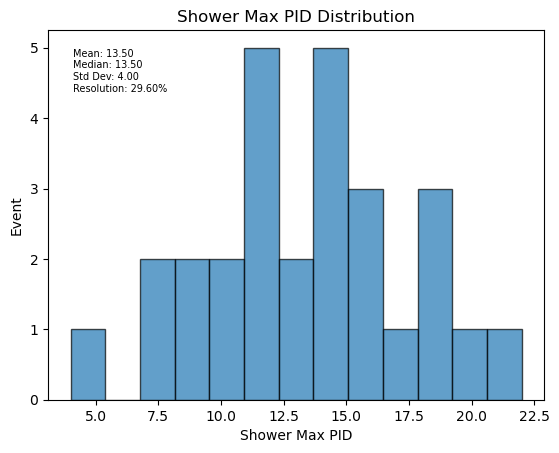

In [578]:
plot_gaussian(shower_profile["nsegsum"], text="NSegSum", binning=20)
plot_gaussian(shower_profile["shower_max"], text="Shower Max", binning=13, fit_resolution=False)
plot_gaussian(shower_profile["max_pid"], text="Shower Max PID", binning=13, fit_resolution=False)

### Distributions after Truth Cylinder Selections

In the next block, we apply the **truth** cylinder selections on our simulation samples. Which means, it'll be based at the cylinder opened by the truth axis.

the truth axis information is stored in `~/faser/testbeam/MC/eMC/FaserMC-TBnu_PG_elec_200GeV-100116-00001-s0012-NTUP.root`

In [579]:
fileTruth = ROOT.TFile("~/faser/testbeam/MC/eMC/FaserMC-TBnu_PG_elec_200GeV-100116-00001-s0012-NTUP.root")
treeTruth = fileTruth.Get("m_NuMCTruth_tree")

# Convert to RDataFrame
rdf = ROOT.RDataFrame(treeTruth)

# Convert to Pandas DataFrame
branches = ["m_event_id_MC", "m_track_id", "m_px", "m_py", "m_pz"]  # Replace with actual branch names
truth_df = rdf.AsNumpy(branches)
truth_df = pd.DataFrame(truth_df)
truth_df_primary = truth_df[(truth_df["m_track_id"]==10001) & ((truth_df["m_event_id_MC"]+100000).isin(true_num))]

In [580]:
print(len(truth_df_primary))
truth_df_primary.head(5)

28


,m_event_id_MC,m_track_id,m_px,m_py,m_pz
257000,89,10001,-44.796749,-31.315752,200000.000000
335172,116,10001,95.210091,102.020943,199999.953125
355412,123,10001,-66.590103,143.391541,199999.937500
433521,150,10001,52.941639,-74.827667,199999.984375
447881,155,10001,-80.189621,-10.754306,199999.984375


In [581]:
len(true_prim)

32

In [582]:
print(true_prim["evtID"].unique()-100000)
print(true_num-100000)
print(truth_df_primary["m_event_id_MC"].unique())

[162 210 826 922 116 225 448 598  89 706 288 890 930 857 640 833 123 301
 537 400 852 150 291 325 155 160 641 803]
[210  89 598 225 448 833 706 116 400 160 288 291 325 150 890 930 803 922
 857 162 640 123 301 537 826 852 155 641]
[ 89 116 123 150 155 160 162 210 225 288 291 301 325 400 448 537 598 640
 641 706 803 826 833 852 857 890 922 930]


#### 🍻 Great!! Now they all matched.

Let's apply the **truth cylinder selection** now.

In [583]:
axis = Seg()
df_cylinder = pd.DataFrame()
shower_profile = pd.DataFrame(columns=['prim_track', 'nsegsum', 'shower_max', 'max_pid', 'shower_start'])

for i, row in truth_df_primary.iterrows():
    df_prim_evt = true_prim[true_prim["evtID"]==row["m_event_id_MC"]+100000]
    trkID = row["m_track_id"]
    if len(df_prim_evt)==0: continue

    x = df_prim_evt["X"].iloc[0]
    y = df_prim_evt["Y"].iloc[0]
    z = df_prim_evt["Z"].iloc[0]
    pid = df_prim_evt["PID"].iloc[0]

    px = row["m_px"]
    py = row["m_py"]
    pz = row["m_pz"]

    tx = px/pz
    ty = py/pz

    # print(f"X={x}, Y={y}, Z={z}, tx={tx}, ty={ty}")
    axis.set_attributes(x, y, z, tx, ty, pid) # the truth axis for one primary electron

    df_evt = df[df["evtID"]==row["m_event_id_MC"]+100000]

    z0 = z
    df_evt_selected = count_cylinder(axis, df_evt, z0)
    #print(len(df_evt_selected))

    profile = df_evt_selected.groupby('PID').size().reset_index(name='count')
    profile.columns = ['PID', 'count']
    shower_max = profile['count'].max()
    max_pid = int(profile.loc[profile['count'] == shower_max, 'PID'].iloc[0])
    pid_range = range(max_pid - 3, max_pid + 4)
    nsegsum = profile[profile['PID'].isin(pid_range)]['count'].sum()
    # if(len(selected_segments)>30): print(f'shower max={shower_max} at PID {max_pid}, nsegsum={nsegsum}')
    grouped = df_evt_selected.groupby(["PID"])["trkID"].nunique()
    filtered = grouped[grouped > 1]
    if len(filtered)>0:
        min_pid_start = int(filtered.index.get_level_values('PID').min())
    else:
        min_pid_start = 10000

    shower_profile = pd.concat([shower_profile, pd.DataFrame([{'prim_track': trkID, 'nsegsum': nsegsum, 'shower_max': shower_max, 'max_pid': max_pid, 'shower_start': min_pid_start}])
    ], ignore_index=True)

    df_cylinder = pd.concat([df_cylinder, df_evt_selected], ignore_index=True)

In [584]:
len(df_cylinder["evtID"].unique())

28

In [494]:
df_cylinder.to_csv(f"/Users/wyx/py38/cylinder_truth.csv", index=False)
shower_profile.to_csv(f"/Users/wyx/py38/shower_truth.csv", index=False)

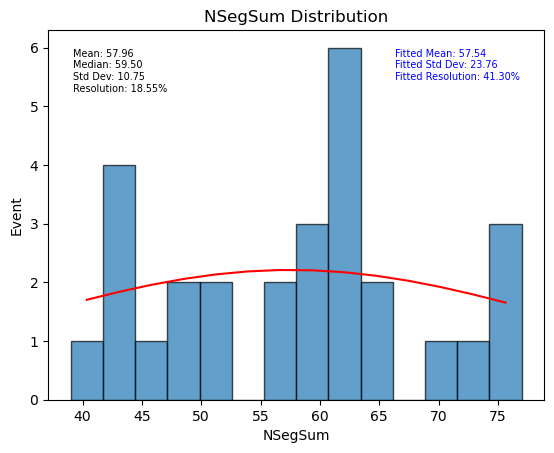

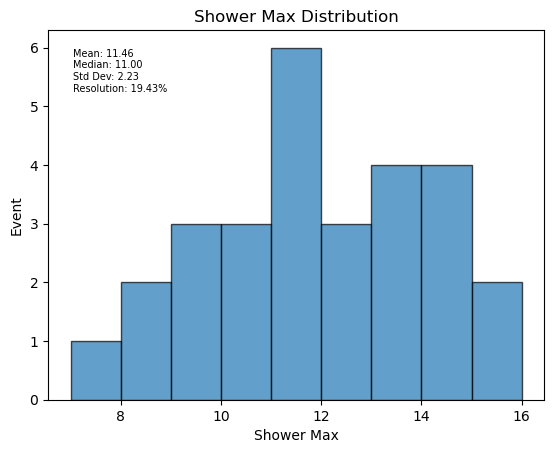

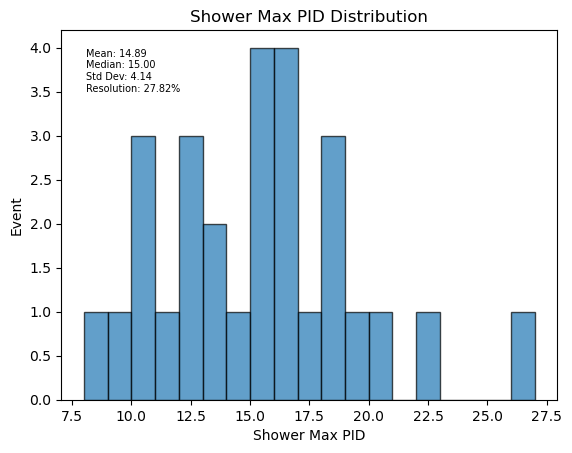

In [593]:
plot_gaussian(shower_profile["nsegsum"], text="NSegSum", binning=14)
plot_gaussian(shower_profile["shower_max"], text="Shower Max", binning=9, fit_resolution=False)
plot_gaussian(shower_profile["max_pid"], text="Shower Max PID", binning=19, fit_resolution=False)